In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium

In [3]:
records = pd.read_csv('data/airbnb_nyc.csv')

In [106]:
records.head(10)

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
5,11943,Country space in the city,NaN,Ditmas Park. Entire 3rd floor. 2 large rooms ...,none,NaN,NaN,"No smoking, no cooking on 3rd floor",45445,40098.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
6,12299,Beautiful Sunny Park Slope Brooklyn,NaN,This is a large one bedroom apartment located ...,none,NaN,NaN,NaN,47610,40108.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
7,12627,Entire apartment in central Brooklyn neighborh...,My place is close to Prospect Park and you’ll...,My place is close to Prospect Park and you’ll...,none,"Steps from Beautiful Prospect Park, Zoo, Brook...","NYC Subway lines Q, B, and S to Prospect Park....",NaN,49670,40115.0,...,-1,1,1,-1,-1,-1,-1,-1,-1,-1
8,13050,bright and stylish duplex,"Wonderfully bright, comfortable, and stylish, ...","Wonderfully bright, comfortable, and stylish, ...",none,The Putnam-Throop area of Bed-Stuy is a vibran...,"Three useful buses (26, 52, 43) are three or f...","Absolutely, positively NO smoking, either insi...",50846,40119.0,...,-1,1,-1,-1,-1,1,-1,-1,-1,-1
9,14322,Beautiful Apartment in Manhattan!!!,"You will find a welcoming apartment, I love to...","You will find a welcoming apartment, I love to...",none,"They are very private, so please respect their...","You have trains N/R/6 and buses(on 2av, 3ave 2...",Cleaning fee is required. NO SHOES USED IN THE...,56284,40138.0,...,1,1,-1,1,-1,-1,-1,-1,-1,-1


### Inspecting the shape of the dataframe and the datatypes of the variables

In [17]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16623 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

In [127]:
#Almost all varibles have a NaN value

list(records.isna())

['id',
 'name',
 'summary',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'transit',
 'house_rules',
 'host_id',
 'host_since',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calcul

### Exploring number of listings per host
#### Having many listings per host maybe an indicator that they use airbnb hosting as a major preoccupation

In [37]:
records["host_id"]

0             2787
1             4632
2            17985
3            25326
4            26394
           ...    
30174    107716952
30175      8232441
30176      6570630
30177     30985759
30178     68119814
Name: host_id, Length: 30179, dtype: int64

In [38]:
records["host_id"].iloc[120:130]

120     903686
121    1024355
122    1096084
123     293130
124    1109658
125    1121193
126    1129218
127     759583
128    1138692
129     846050
Name: host_id, dtype: int64

In [43]:
records["host_id"].iloc[30169:30178]

30169    131529729
30170    274307600
30171    131529729
30172    274311461
30173    274321313
30174    107716952
30175      8232441
30176      6570630
30177     30985759
Name: host_id, dtype: int64

In [57]:
records["host_id"].iloc[20000:20010]

20000    215727176
20001    137817563
20002     92733485
20003     23354644
20004       172741
20005    102180676
20006     26585911
20007     18022132
20008    215765235
20009    215778245
Name: host_id, dtype: int64

In [40]:
#There are 24396 unique hosts in this dataframe, as shown by the number of host_ids
#That means 5783 hosts have more than one listing

records["host_id"].value_counts()

219517861    236
107434423    159
137358866    103
30283594      94
12243051      78
            ... 
9111709        1
60002757       1
36234842       1
37927366       1
68119814       1
Name: host_id, Length: 24396, dtype: int64

In [56]:
records["host_id"].value_counts().iloc[120:130]

52950465     7
255641440    7
213208277    7
204704622    7
261750091    7
145878384    7
193502084    7
224815152    7
263880607    7
260861596    7
Name: host_id, dtype: int64

In [64]:
records["host_id"].value_counts().iloc[:30]

219517861    236
107434423    159
137358866    103
30283594      94
12243051      78
61391963      72
16098958      66
22541573      50
200380610     44
26377263      43
19303369      36
1475015       36
113805886     33
213781715     33
238321374     32
2856748       31
2119276       30
13347167      29
119669058     28
190921808     26
25237492      26
226410657     26
230192510     25
39528519      24
50760546      24
131647128     24
221200420     23
120762452     23
9864136       23
242962235     23
Name: host_id, dtype: int64

In [129]:
records["property_type"][30:50]

30    Apartment
31    Apartment
32    Apartment
33    Apartment
34    Apartment
35    Townhouse
36    Apartment
37    Apartment
38    Apartment
39    Apartment
40    Apartment
41    Apartment
42    Apartment
43    Apartment
44    Apartment
45    Apartment
46    Apartment
47    Apartment
48    Apartment
49    Apartment
Name: property_type, dtype: object

### Exploring type of listings

#### Which are the most common property types?
Looking at the popularity of certain property types may be an indicator of the most prefered listings. It might also show which properties are in low supply, and therefore provide basis for various inferences e.g. which property types prospective hosts can opt for

In [128]:
property_counts = records["property_type"].value_counts()
property_counts

Apartment                 24538
House                      2125
Condominium                 982
Townhouse                   772
Loft                        740
Serviced apartment          290
Hotel                       192
Guest suite                 137
Boutique hotel              104
Other                        65
Bed and breakfast            63
Hostel                       43
Resort                       25
Guesthouse                   24
Bungalow                     19
Aparthotel                   11
Villa                         9
Tiny house                    7
Cabin                         4
Earth house                   4
Casa particular (Cuba)        3
Tent                          3
Boat                          3
Cottage                       3
Farm stay                     2
Yurt                          2
Cave                          2
Houseboat                     2
Dome house                    1
Castle                        1
Camper/RV                     1
Treehous

#### Which kind of property types have accessibility features?

In [84]:
records[["property_type", "accessible"]]  

,property_type,accessible
0,Apartment,1
1,Apartment,-1
2,Apartment,-1
3,Condominium,-1
4,Apartment,-1
...,...,...
30174,House,-1
30175,Townhouse,-1
30176,Apartment,-1
30177,Apartment,-1


#### Property types that are 'accessible'

In [82]:
records["accessible"].value_counts()

-1    28315
 1     1864
Name: accessible, dtype: int64

#### What is the location of the property types categorised by accessibility features?

In [91]:
from folium.plugins import HeatMap

In [92]:
records[["latitude", "longitude", "accessible"]]

,latitude,longitude,accessible
0,40.64749,-73.97237,1
1,40.80902,-73.94190,-1
2,40.79685,-73.94872,-1
3,40.65599,-73.97519,-1
4,40.86754,-73.92639,-1
...,...,...,...
30174,40.69137,-73.80844,-1
30175,40.67853,-73.94995,-1
30176,40.70184,-73.93317,-1
30177,40.75751,-73.99112,-1


In [93]:
records[["latitude", "longitude"]].mean()

latitude     40.728593
longitude   -73.952292
dtype: float64

In [94]:
accessibility = list(zip(records["latitude"], records["longitude"], records["accessible"]))
accessibility 

[(40.64749, -73.97237, 1),
 (40.80902, -73.9419, -1),
 (40.79685, -73.94872, -1),
 (40.65599, -73.97519, -1),
 (40.86754, -73.92639, -1),
 (40.63702, -73.96327, -1),
 (40.66278, -73.97966, -1),
 (40.65944, -73.96238, -1),
 (40.68554, -73.9409, -1),
 (40.73961, -73.98074, -1),
 (40.72004, -73.99104, -1),
 (40.6734299999999, -73.98338, -1),
 (40.65401, -73.96323, -1),
 (40.72912, -73.98057, -1),
 (40.68634, -73.966, -1),
 (40.82803, -73.94731, -1),
 (40.82279, -73.95139, -1),
 (40.68157, -73.98989, -1),
 (40.68698, -73.9657199999999, -1),
 (40.7288, -73.98192, -1),
 (40.7254, -73.9815699999999, 1),
 (40.66499, -73.97925, -1),
 (40.77842, -73.97556, -1),
 (40.65593, -73.96053, 1),
 (40.7192299999999, -73.96468, 1),
 (40.6318799999999, -73.93248, 1),
 (40.73409, -73.95348, 1),
 (40.71561, -73.94835, -1),
 (40.6857, -73.99183, -1),
 (40.74028, -73.83168, -1),
 (40.7159599999999, -73.93938, -1),
 (40.6741, -73.96595, -1),
 (40.76123, -73.9642, -1),
 (40.82704, -73.9490699999999, -1),
 (40.82

In [99]:
accessibility_map = folium.Map(location = [40.728593, -73.952292], tiles = "CartoDB positron", zoom_start = 10)

accessibility_map.add_child(HeatMap(accessibility, min_opacity = 1, radius = 20, blur = 30))

#### Plot a map of only those properties that are accessible

In [89]:
accessible_listings = records[records["accessible"] == 1]
accessible_listings

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
20,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,***PLEASE DO NOT MAKE RESERVATION REQUEST UNTI...,***PLEASE DO NOT MAKE RESERVATION REQUEST UNTI...,none,"If you like food and drink, the East Village i...",Walking is the safest and easiest way to get a...,"No children. If you have children, please look...",72062,40198.0,...,-1,1,-1,1,-1,-1,-1,1,1,-1
23,28321,Large 1 BR in a 3 BR Brooklyn apt. next to Q ...,Queen size BR .. right next door to the Q tra...,Queen size BR .. right next door to the Q tra...,none,"laundry drop off across the street , dry clea...",The neighborhood is Prospect Lefferts Garden...,have fun and make the most of your visit. I am...,65091,40169.0,...,1,1,-1,-1,-1,-1,-1,-1,1,1
24,28396,Modern Apt with Spectacular Views,This Northside Williamsburg apartment is in Th...,This Northside Williamsburg apartment is in Th...,none,"If you are looking to stay in Williamsburg, yo...",The apartment is 5 blocks to the L train (Bedf...,A copy of passport & drivers license are requi...,6197784,41396.0,...,-1,1,-1,1,-1,-1,-1,-1,1,-1
25,31902,Sanctuary in East Flatbush,Come and Stay in a warm and nurturing environm...,Come and Stay in a warm and nurturing environm...,none,I love the sweetness and tranquility. I love ...,Yes! 2/5 train to Flatbush B6 to Corner of th...,"Our place is a sanctuary, please treat it with...",137292,40331.0,...,-1,1,-1,1,-1,-1,-1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29958,36353849,Hip Neighborhood/Private Bedroom in Modern Duplex,This is a private bedroom in a 4 bedroom duple...,This is a private bedroom in a 4 bedroom duple...,none,NaN,Best way is to use the subway - the apartment ...,NaN,81345246,42553.0,...,-1,1,-1,1,-1,-1,-1,-1,1,-1
29964,36356804,Bright quiet and Comfortable,NaN,NaN,none,NaN,NaN,NaN,222559543,43398.0,...,1,1,1,-1,-1,-1,-1,-1,1,-1
29975,36372006,Very Clean Private Room Near Buses & Restauran...,"Excellent clean space, quiet night, convenient...","Excellent clean space, quiet night, convenient...",none,Woodhaven is a middle-class neighborhood locat...,16mins drive to/from JFK airport 5 mins walk t...,Checking after 2:00PM - Please do not turn on ...,118405437,42793.0,...,-1,1,1,-1,1,-1,1,-1,1,-1
30038,36412355,Diamond in the Rough,This is a simple and private room in an incred...,This is a simple and private room in an incred...,none,NaN,The Forest Hills 71st Ave / Continental Ave su...,Do not pick up host's dog. Do not use the wash...,2716800,41083.0,...,-1,1,-1,-1,-1,-1,-1,-1,1,-1


In [100]:
accessible_only = list(zip(records["latitude"], records["longitude"], accessible_listings["accessible"]))
accessible_only

[(40.64749, -73.97237, 1),
 (40.80902, -73.9419, 1),
 (40.79685, -73.94872, 1),
 (40.65599, -73.97519, 1),
 (40.86754, -73.92639, 1),
 (40.63702, -73.96327, 1),
 (40.66278, -73.97966, 1),
 (40.65944, -73.96238, 1),
 (40.68554, -73.9409, 1),
 (40.73961, -73.98074, 1),
 (40.72004, -73.99104, 1),
 (40.6734299999999, -73.98338, 1),
 (40.65401, -73.96323, 1),
 (40.72912, -73.98057, 1),
 (40.68634, -73.966, 1),
 (40.82803, -73.94731, 1),
 (40.82279, -73.95139, 1),
 (40.68157, -73.98989, 1),
 (40.68698, -73.9657199999999, 1),
 (40.7288, -73.98192, 1),
 (40.7254, -73.9815699999999, 1),
 (40.66499, -73.97925, 1),
 (40.77842, -73.97556, 1),
 (40.65593, -73.96053, 1),
 (40.7192299999999, -73.96468, 1),
 (40.6318799999999, -73.93248, 1),
 (40.73409, -73.95348, 1),
 (40.71561, -73.94835, 1),
 (40.6857, -73.99183, 1),
 (40.74028, -73.83168, 1),
 (40.7159599999999, -73.93938, 1),
 (40.6741, -73.96595, 1),
 (40.76123, -73.9642, 1),
 (40.82704, -73.9490699999999, 1),
 (40.82374, -73.9373, 1),
 (40.7038

In [105]:
accessibility_map = folium.Map(location = [40.728593, -73.952292], tiles = "CartoDB positron", zoom_start = 10)

accessibility_map.add_child(HeatMap(accessible_only, min_opacity = 1, radius = 20, blur = 30))

#### Location of listings for the host with the most listings. i.e host_id 219517861

In [108]:
most_listings = records[records["host_id"] == 219517861]
most_listings

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
21575,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,"Featured in The New York Times, The Wall Stree...","Featured in The New York Times, The Wall Stree...",none,Financial District highlights - Walkability s...,NaN,House Rules 1. All bookings require a security...,219517861,43381.0,...,1,1,1,1,-1,-1,-1,-1,-1,-1
21576,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,"Featured in The New York Times, The Wall Stree...","Featured in The New York Times, The Wall Stree...",none,Financial District highlights - Walkability s...,NaN,House Rules 1. All bookings require a security...,219517861,43381.0,...,1,1,1,1,-1,-1,-1,-1,-1,-1
21774,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,"Featured in The New York Times, The Wall Stree...","Featured in The New York Times, The Wall Stree...",none,Financial District highlights - Walkability s...,NaN,House Rules 1. All bookings require a security...,219517861,43381.0,...,1,1,1,1,-1,-1,-1,-1,-1,-1
22639,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,"Featured in The New York Times, The Wall Stree...","Featured in The New York Times, The Wall Stree...",none,Midtown East highlights - Walkability score -...,NaN,House Rules 1. All bookings require a security...,219517861,43381.0,...,-1,1,1,-1,-1,-1,-1,-1,-1,-1
22640,30937595,Sonder | 11th Ave | Bright 1BR + Gym,"Featured in The New York Times, The Wall Stree...","Featured in The New York Times, The Wall Stree...",none,Hell's Kitchen highlights - Walkability score ...,NaN,House Rules 1. All bookings require a security...,219517861,43381.0,...,-1,1,1,1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27692,35034032,Sonder | 116 John | Vibrant 1BR + Gym,"Featured in The New York Times, The Wall Stree...","Featured in The New York Times, The Wall Stree...",none,Financial District highlights - Walkability s...,NaN,House Rules 1. All bookings require a security...,219517861,43381.0,...,-1,1,1,1,-1,-1,-1,-1,-1,-1
29006,35793784,Sonder | 116 John | Tasteful 2BR + Gym,"Featured in The New York Times, The Wall Stree...","Featured in The New York Times, The Wall Stree...",none,"In Lower Manhattan, the Financial District is ...",NaN,House Rules 1. All bookings require a security...,219517861,43381.0,...,-1,1,1,1,-1,-1,-1,-1,-1,-1
29141,35869234,Sonder | 116 John | Classic 1BR + Gym,"Featured in The New York Times, The Wall Stree...","Featured in The New York Times, The Wall Stree...",none,Financial District highlights - Walkability s...,NaN,House Rules 1. All bookings require a security...,219517861,43381.0,...,-1,1,1,1,-1,-1,-1,-1,-1,-1
29144,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,"Featured in The New York Times, The Wall Stree...","Featured in The New York Times, The Wall Stree...",none,Financial District highlights - Walkability s...,NaN,House Rules 1. All bookings require a security...,219517861,43381.0,...,-1,1,1,1,-1,-1,-1,-1,-1,-1


In [151]:
most_listings[["latitude", "longitude"]][-10:]

,latitude,longitude
27642,40.74725,-73.97607
27643,40.74288,-73.99438
27644,40.74295,-73.99521
27645,40.74451,-73.97270
27646,40.75954,-73.98604
27692,40.70861,-74.00479
29006,40.70833,-74.00497
29141,40.70852,-74.00510
29144,40.70691,-74.00682
29145,40.70772,-74.00673


In [132]:
most_listings[["latitude", "longitude"]].mean()

latitude     40.721540
longitude   -74.002004
dtype: float64

In [137]:
most_listings_map = folium.Map(location = [40.721540, -74.002004], tiles = "Stamen Terrain", zoom_start = 11)
most_listings_map

#### Price distribution of listings by host with most listings

In [144]:
most_listings[["price"]]

,price
21575,302
21576,229
21774,232
22639,262
22640,185
...,...
27692,137
29006,270
29141,198
29144,165


In [149]:
most_listings.describe()

,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
count,2.360000e+02,236.0,236.0,2.360000e+02,236.0,236.0,236.0,236.000000,236.000000,236.000000,...,236.000000,236.0,236.0,236.000000,236.0,236.0,236.000000,236.0,236.0,236.0
mean,3.327629e+07,219517861.0,43381.0,9.800000e-01,0.0,328.0,0.0,40.721540,-74.002004,4.228814,...,-0.966102,1.0,1.0,-0.237288,-1.0,-1.0,0.177966,-1.0,-1.0,-1.0
std,1.147109e+06,0.0,0.0,3.337748e-16,0.0,0.0,0.0,0.022286,0.014000,1.404619,...,0.258710,0.0,0.0,0.973504,0.0,0.0,0.986128,0.0,0.0,0.0
min,3.018169e+07,219517861.0,43381.0,9.800000e-01,0.0,328.0,0.0,40.705600,-74.012580,2.000000,...,-1.000000,1.0,1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0
25%,3.224004e+07,219517861.0,43381.0,9.800000e-01,0.0,328.0,0.0,40.706488,-74.011660,4.000000,...,-1.000000,1.0,1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0
50%,3.363501e+07,219517861.0,43381.0,9.800000e-01,0.0,328.0,0.0,40.707500,-74.010480,4.000000,...,-1.000000,1.0,1.0,-1.000000,-1.0,-1.0,1.000000,-1.0,-1.0,-1.0
75%,3.420754e+07,219517861.0,43381.0,9.800000e-01,0.0,328.0,0.0,40.746977,-73.996045,4.000000,...,-1.000000,1.0,1.0,1.000000,-1.0,-1.0,1.000000,-1.0,-1.0,-1.0
max,3.587152e+07,219517861.0,43381.0,9.800000e-01,0.0,328.0,0.0,40.764470,-73.962950,8.000000,...,1.000000,1.0,1.0,1.000000,-1.0,-1.0,1.000000,-1.0,-1.0,-1.0


In [148]:
most_listings.describe()["price"]

count    236.000000
mean     251.894068
std       88.878266
min      130.000000
25%      200.000000
50%      229.000000
75%      256.000000
max      498.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

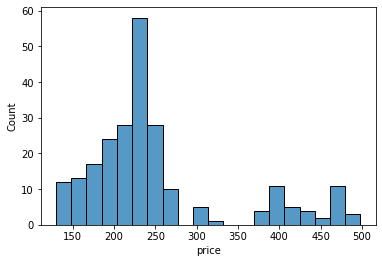

In [158]:
sns.histplot(data = most_listings, x = "price", bins = 20)

#### Location distribution of the most common property types

In [126]:
popular_property = records[records["property_type"] == "Apartment"]
popular_property

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
6,12299,Beautiful Sunny Park Slope Brooklyn,NaN,This is a large one bedroom apartment located ...,none,NaN,NaN,NaN,47610,40108.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30172,36483010,Comfy 1 Bedroom in Midtown East,Great 1 bedroom apartment on a quiet tree line...,Great 1 bedroom apartment on a quiet tree line...,none,"Midtown East which has everything 1 needs, bu...",All major buses and subways/metros are within ...,NaN,274311461,43653.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
30173,36484087,"Spacious Room w/ Private Rooftop, Central loca...",Heart of Hell's Kitchen. Our place features pr...,Heart of Hell's Kitchen. Our place features pr...,none,So many great restaurants I don't know where t...,"All the trains are pretty close E,C is 2 block...",NaN,274321313,43653.0,...,-1,1,-1,-1,-1,-1,-1,1,-1,-1
30176,36485057,Affordable room in Bushwick/East Williamsburg,NaN,NaN,none,NaN,NaN,NaN,6570630,41419.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30177,36485609,43rd St. Time Square-cozy single bed,NaN,NaN,none,NaN,NaN,NaN,30985759,42104.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,-1


In [152]:
popular_property[["latitude", "longitude"]]

,latitude,longitude
0,40.64749,-73.97237
1,40.80902,-73.94190
2,40.79685,-73.94872
4,40.86754,-73.92639
6,40.66278,-73.97966
...,...,...
30172,40.75561,-73.96723
30173,40.76392,-73.99183
30176,40.70184,-73.93317
30177,40.75751,-73.99112


In [153]:
popular_property[["latitude", "longitude"]].mean()

latitude     40.731508
longitude   -73.956374
dtype: float64

In [164]:
popular_property_map = folium.Map(location = [40.731508, -73.956374], tiles = "OpenStreetMap", zoom_start = 11)
popular_property_map 

#This doesn't feel complete

### How does the price vary across the different property types?

<AxesSubplot:xlabel='property_type', ylabel='price'>

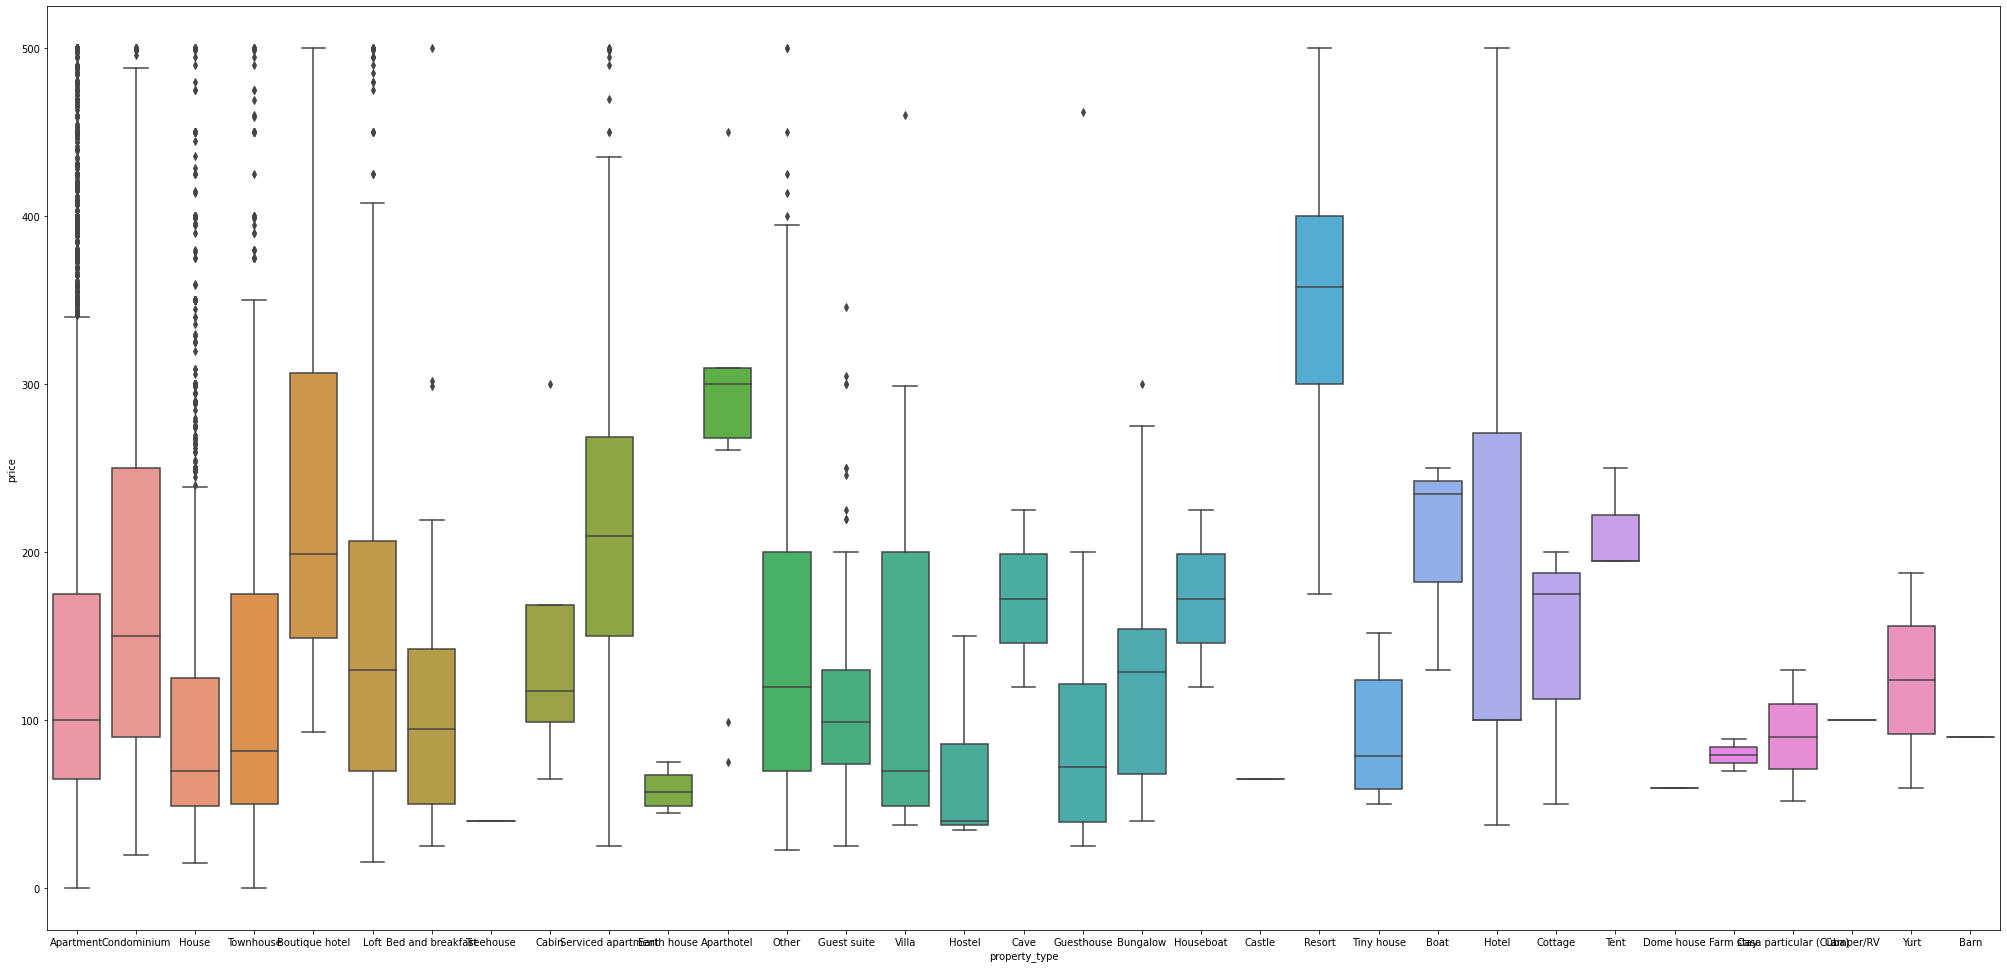

In [178]:
plt.figure(figsize = (35, 17))
sns.boxplot(x=records["property_type"], y=records["price"])

<AxesSubplot:xlabel='price', ylabel='property_type'>

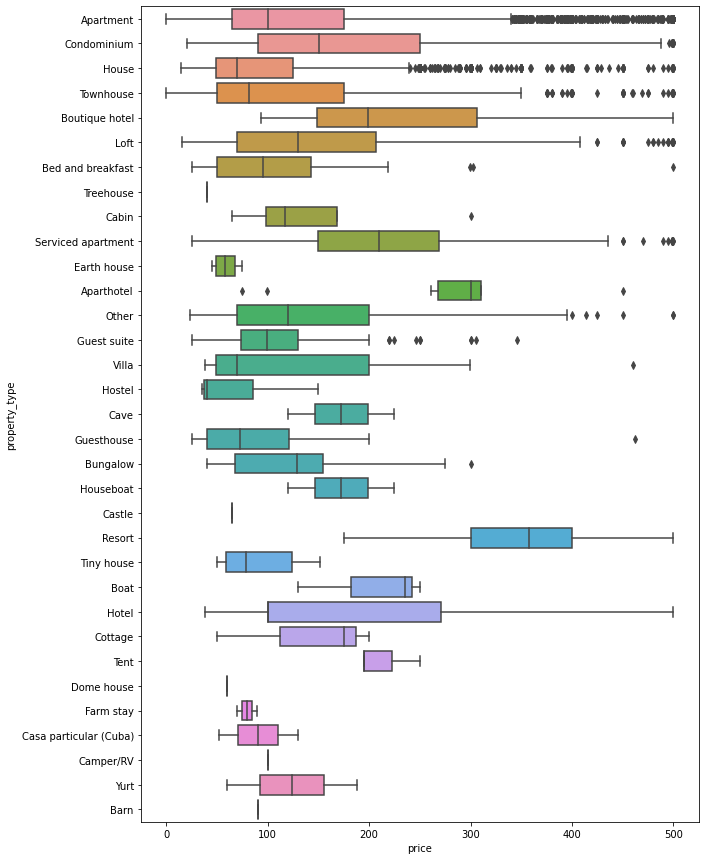

In [180]:
#Same plot with the axes interchanged

plt.figure(figsize = (10, 15))
sns.boxplot(x=records["price"], y=records["property_type"])

### Is there correlation among "long_term_stays", "pets_allowed", "outdoor_space", "bbq"?

In [161]:
records[["long_term_stays", "pets_allowed", "outdoor_space", "bbq"]].corr()

,long_term_stays,pets_allowed,outdoor_space,bbq
long_term_stays,1.000000,0.055579,0.198080,0.217238
pets_allowed,0.055579,1.000000,0.060226,0.139669
outdoor_space,0.198080,0.060226,1.000000,0.455711
bbq,0.217238,0.139669,0.455711,1.000000
